<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Using-Logistic-Regression-to-classify" data-toc-modified-id="Using-Logistic-Regression-to-classify-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using Logistic Regression to classify</a></span><ul class="toc-item"><li><span><a href="#My-toolkit" data-toc-modified-id="My-toolkit-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>My toolkit</a></span></li><li><span><a href="#Get-Data" data-toc-modified-id="Get-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Get Data</a></span></li><li><span><a href="#Initial-EDA" data-toc-modified-id="Initial-EDA-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Initial EDA</a></span></li><li><span><a href="#Initial-cleaning-steps" data-toc-modified-id="Initial-cleaning-steps-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Initial cleaning steps</a></span><ul class="toc-item"><li><span><a href="#Deal-with-nulls" data-toc-modified-id="Deal-with-nulls-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Deal with nulls</a></span></li><li><span><a href="#Useless-columns" data-toc-modified-id="Useless-columns-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Useless columns</a></span></li><li><span><a href="#duplicates" data-toc-modified-id="duplicates-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>duplicates</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Pre-processing" data-toc-modified-id="Pre-processing-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Pre processing</a></span></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Train Test Split</a></span></li><li><span><a href="#Define-and-Apply-Model---logistic-regression-to-classify" data-toc-modified-id="Define-and-Apply-Model---logistic-regression-to-classify-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Define and Apply Model - logistic regression to classify</a></span></li><li><span><a href="#Assessing-the-accuracy-of-our-classification-model" data-toc-modified-id="Assessing-the-accuracy-of-our-classification-model-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Assessing the accuracy of our classification model</a></span></li></ul></li><li><span><a href="#What-can-we-do?" data-toc-modified-id="What-can-we-do?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What can we do?</a></span><ul class="toc-item"><li><span><a href="#Resampling-Techniques" data-toc-modified-id="Resampling-Techniques-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Resampling Techniques</a></span><ul class="toc-item"><li><span><a href="#Random-Under-Sampler" data-toc-modified-id="Random-Under-Sampler-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Random Under Sampler</a></span></li><li><span><a href="#Try-Model-with-Rus-and-Ros" data-toc-modified-id="Try-Model-with-Rus-and-Ros-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Try Model with Rus and Ros</a></span></li></ul></li></ul></li><li><span><a href="#Correlating-categories" data-toc-modified-id="Correlating-categories-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Correlating categories</a></span><ul class="toc-item"><li><span><a href="#Chi-Squared" data-toc-modified-id="Chi-Squared-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Chi Squared</a></span></li></ul></li><li><span><a href="#AUC---area-under-the-curve" data-toc-modified-id="AUC---area-under-the-curve-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>AUC - area under the curve</a></span></li></ul></div>

# Using Logistic Regression to classify
- when data

## My toolkit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler

## Get Data

In [2]:
df=pd.read_csv('strokes_data.csv')

## Initial EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [5]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


## Initial cleaning steps
- deal with nulls
- drop any useless columns
- identify if any duplicates and then drop as needed
- try to retain as many minority class as possible
- fill null methods - in this case the point is to retain as much data as possible


### Deal with nulls
- fill null smoker status with 'unknow'
- fill null bmi with median bmi of whole data set

In [6]:
df['smoking_status']=df['smoking_status'].fillna('unknow')

In [7]:
medianbmi = (df['bmi'].loc[df['bmi']!=0]).median()

In [8]:
medianbmi

27.7

In [9]:
df['bmi']=df['bmi'].fillna(medianbmi)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                43400 non-null  float64
 10  smoking_status     43400 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


### Useless columns
- drop id column

In [11]:
df=df.drop(['id'], axis=1)

### duplicates

In [12]:
df=df.drop_duplicates()
# there are none in this df

## EDA 
- review columns: distribution, counts, correlation

## Pre processing
- enconde categories
- scale numerics

In [13]:
# split the data in categorical and numerical
y = df['stroke']
X = df.drop('stroke', axis=1)
X_num = X.select_dtypes(include=np.number)
X_cat = X.select_dtypes(exclude=np.number)

In [14]:
X_num.head(1)

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,3.0,0,0,95.12,18.0


In [15]:
X_cat.head(1)

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,No,children,Rural,unknow


In [16]:
X_cat_dummies=pd.get_dummies(X_cat, drop_first=True)

In [17]:
X_cat_dummies_2=pd.get_dummies(X_cat)

In [18]:
X_cat_dummies.head(3)

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknow
0,1,0,0,0,0,0,1,0,0,0,1
1,1,0,1,0,1,0,0,1,1,0,0
2,0,0,0,0,1,0,0,1,0,0,1


In [19]:
X_cat_dummies_2.head(3)

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknow
0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1
1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1


In [20]:
scaler = RobustScaler()
scaler.fit(X_num)
X_num_scaled = pd.DataFrame(scaler.transform(X_num), columns=X_num.columns)

In [21]:
X_full = pd.concat([X_cat_dummies,X_num_scaled], axis=1)

In [22]:
X_full.shape

(43400, 16)

In [23]:
y.shape

(43400,)

In [24]:
X_full.head(1)

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknow,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,0,0,0,0,0,1,0,0,0,1,-1.138889,0.0,0.0,0.10252,-1.054348


## Train Test Split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X_full,y,test_size=0.45, random_state=40)

## Define and Apply Model - logistic regression to classify

In [26]:
classification = LogisticRegression(max_iter=500)

In [27]:
classification.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [28]:
y_test_pred = classification.predict(X_test)

In [29]:
accuracy_score(y_test,y_test_pred)

0.9820276497695852

In [30]:
df['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [31]:
df['stroke']

0        0
1        0
2        0
3        0
4        0
        ..
43395    0
43396    0
43397    0
43398    0
43399    0
Name: stroke, Length: 43400, dtype: int64

In [32]:
# if i accepted none would have a stroke
42617/(42617+783)

0.9819585253456221

## Assessing the accuracy of our classification model

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [34]:
confusion_matrix(y_test,y_test_pred)

array([[19179,     0],
       [  351,     0]], dtype=int64)

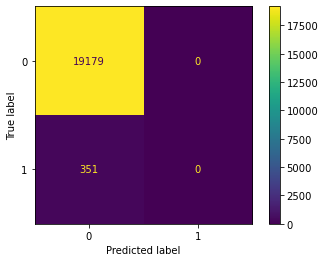

In [35]:
cmx = confusion_matrix(y_test,y_test_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cmx)
disp.plot();

In [36]:
# with this model we didn't predict any strokes. The accuracy is high, but at the same time this model is useless.

# What can we do?

- fit the model to more balanced data
- increase / decrease test_size
- try a different model
- tweak the hyper parameters on log regresion
- change the threshold for likelihood of stroke
- forget machine learning - go back to data visualization and inference
- forget prediction, focus on feature importance
- work with features - create new ones, get more data, clean the data
    - any model won't work because the data isn't balanced. Has few stroke cases to predict it.

## Resampling Techniques

### Random Under Sampler

In [37]:
from imblearn.under_sampling import RandomUnderSampler

In [38]:
X_full.shape

(43400, 16)

In [39]:
df['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [40]:
rus =RandomUnderSampler()
# do we resample the TRAIN data
# do we resample df
# not needed - X_full_inc_y = pd.concat([X_full,,y], axis=1)
X_rus, y_rus = rus.fit_resample(X_full,y)

In [41]:
y.value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [42]:
y_rus.value_counts()

1    783
0    783
Name: stroke, dtype: int64

In [43]:
from imblearn.over_sampling import RandomOverSampler

In [44]:
ros=RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_full,y)

In [45]:
y_ros.value_counts()

1    42617
0    42617
Name: stroke, dtype: int64

### Try Model with Rus and Ros

In [46]:
## Train Test split

X_train_rus,X_test_rus,y_train_rus,y_test_rus=train_test_split(X_rus,y_rus,test_size=0.45,random_state=40)

## Define and apply Model - logistic regression to classify 

classification=LogisticRegression(max_iter=500)

classification.fit(X_train_rus,y_train_rus)

y_test_pred_rus=classification.predict(X_test_rus)

accuracy_score(y_test_rus, y_test_pred_rus)

0.7815602836879433

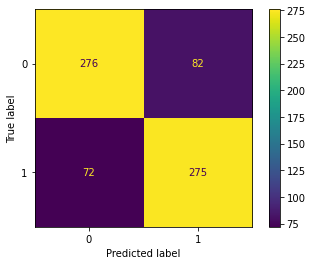

In [47]:
cm_rus = confusion_matrix(y_test_rus,y_test_pred_rus)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_rus)
disp.plot();

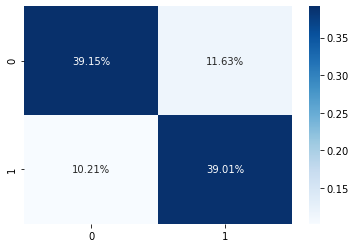

In [48]:
sns.heatmap(cm_rus/np.sum(cm_rus), annot=True, fmt='.2%',cmap='Blues');

In [49]:
## Train Test split

X_train_ros,X_test_ros,y_train_ros,y_test_ros=train_test_split(X_ros,y_ros,test_size=0.45,random_state=40)

## Define and apply Model - logistic regression to classify 

classification=LogisticRegression(max_iter=500)

classification.fit(X_train_ros,y_train_ros)

y_test_pred_ros=classification.predict(X_test_ros)

accuracy_score(y_test_ros, y_test_pred_ros)

0.7821983522786526

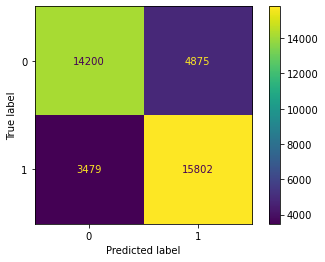

In [50]:
cm_ros=confusion_matrix(y_test_ros,y_test_pred_ros) 
disp=ConfusionMatrixDisplay(confusion_matrix=cm_ros)
disp.plot();

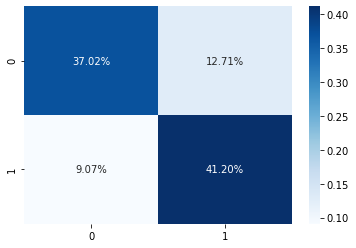

In [51]:
sns.heatmap(cm_ros/np.sum(cm_ros), annot=True, fmt='.2%',cmap='Blues');

# Correlating categories
- use corr matrix heatmap for numbers
- tip - duplicate your binary y label into a numeric field first
- this will include y in your correlation matrix

- use chi squared or ViF or randomforest_featureselection() for categories

## Chi Squared
- cross tabulate the incidences of each category
- start with a pair of features
- something you think  will be correlated?
- work out chi squared statistic

In [52]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [53]:
# work type and residence type
feat_crosstab = pd.crosstab(df['work_type'],df['Residence_type'], margins=False)
feat_crosstab

Residence_type,Rural,Urban
work_type,,
Govt_job,2714,2726
Never_worked,84,93
Private,12320,12514
Self-employed,3444,3349
children,3082,3074


* H0 = null hypothesis, there is no dependency, or relationship - there's not evidence to support my hypothesis - there is no corr between these features
* HA = alternative hypothesis - there is a corr between the features

In [56]:
from scipy.stats import chi2_contingency
chi2_contingency(feat_crosstab, correction = False)

(3.0495585904185893,
 0.5495664171321049,
 4,
 array([[ 2712.98064516,  2727.01935484],
        [   88.2716129 ,    88.7283871 ],
        [12384.95612903, 12449.04387097],
        [ 3387.73483871,  3405.26516129],
        [ 3070.05677419,  3085.94322581]]))

- p values > 0.05 - means no correlation
- so we accept the null hypothesis - we have no evidence to drop either features

# AUC - area under the curve

In [62]:
from sklearn.metrics import roc_auc_score, roc_curve

In [60]:
y_pred_probs = classification.predict_proba(X_test_ros)[::,1]

In [61]:
y_pred_probs

array([0.73591694, 0.86347715, 0.05019193, ..., 0.56206617, 0.11629091,
       0.67125789])

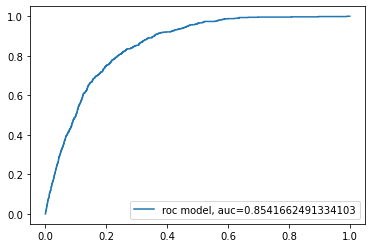

In [64]:
fpr,tpr, _ = roc_curve(y_test_ros, y_pred_probs)
auc = roc_auc_score(y_test_ros, y_pred_probs)
plt.plot(fpr,tpr,label='roc model, auc='+str(auc))
plt.legend(loc=4)
plt.show();

In [66]:
y_pred_raw_probs = classification.predict_proba(X_test)[::,1]

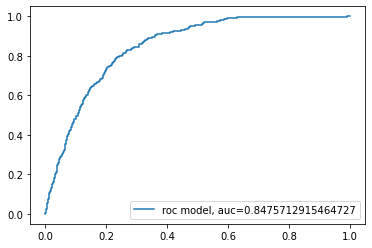

In [67]:
fpr,tpr, _ = roc_curve(y_test, y_pred_raw_probs)
auc = roc_auc_score(y_test, y_pred_raw_probs)
plt.plot(fpr,tpr,label='roc model, auc='+str(auc))
plt.legend(loc=4)
plt.show();